In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
#Importing dataset and reading it
path = "C:/Users/shrav/OneDrive/Desktop/ML projects/Linear regression using numpy and pandas/insurance.csv"
df = pd.read_csv(path)
print('Size of the data is:', df.shape)
df.head()

Size of the data is: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


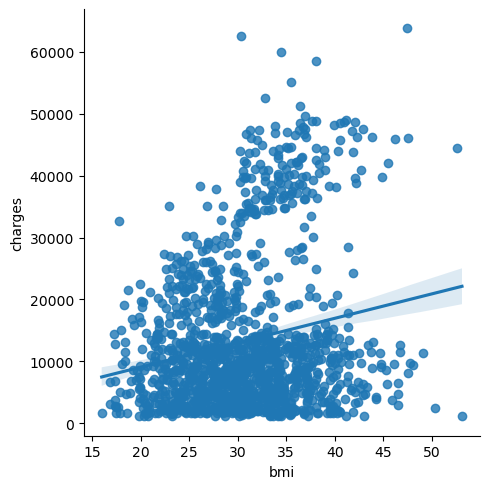

In [8]:
# Visualizing data
sns.lmplot(x='bmi', y='charges', data=df)

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Missing values in the dataset')

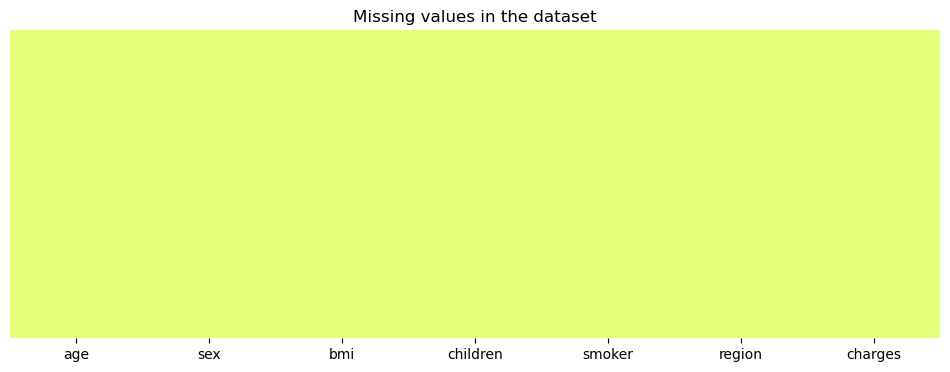

In [20]:
#checking for missing values
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull() , cbar= False,cmap='Wistia',yticklabels=False)
plt.title("Missing values in the dataset")

C:\Users\shrav\AppData\Local\Temp\ipykernel_17424\1210399282.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

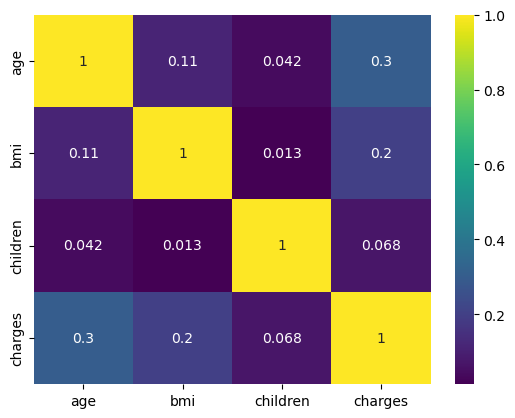

In [21]:
#checking for correlation between variables
corr = df.corr()
sns.heatmap(corr, cmap='viridis',annot=True)

C:\Users\shrav\AppData\Local\Temp\ipykernel_17424\2674639048.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'], bins=50, color='r', ax=ax)
C:\Users\shrav\AppData\Local\Temp\ipykernel_17424\2674639048.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['charges']), bin

Text(0.5, 1.0, 'Distribution of charges in log scale')

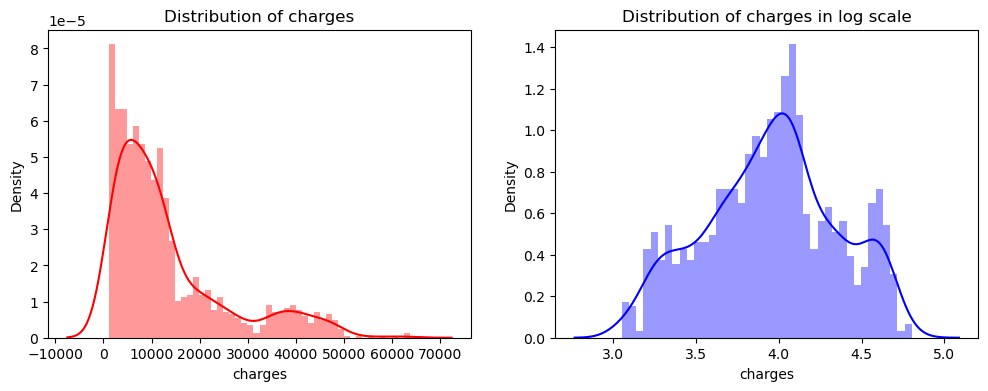

In [25]:
#visualizing distribution
f=plt.figure(figsize=(12,4))
ax = f.add_subplot(121)
sns.distplot(df['charges'], bins=50, color='r', ax=ax)
ax.set_title('Distribution of charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']), bins=40, color='b',ax=ax)
ax.set_title('Distribution of charges in log scale')

<Axes: xlabel='smoker', ylabel='charges'>

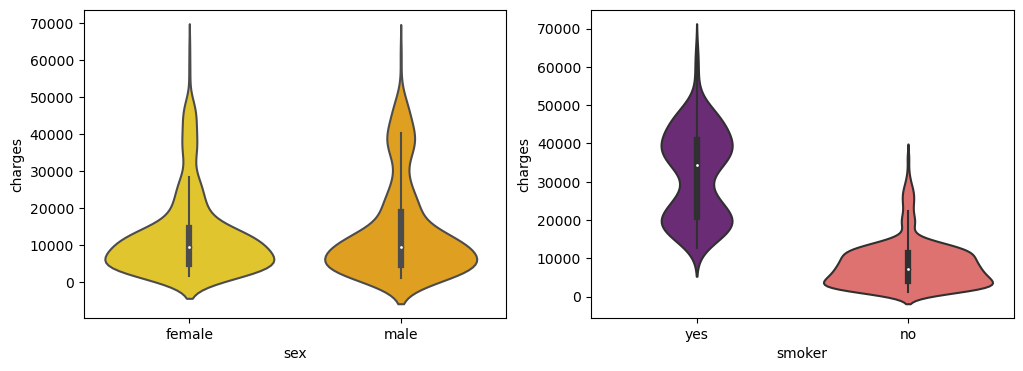

In [30]:
f= plt.figure(figsize=(12,4))
ax = f.add_subplot(121)
sns.violinplot(x= df['sex'], y=df['charges'], data =df, palette='Wistia', ax=ax)


ax = f.add_subplot(122)
sns.violinplot(x= df['smoker'], y=df['charges'], data= df, palette='magma', ax=ax)

Text(0.5, 1.0, 'Bmi vs charges')

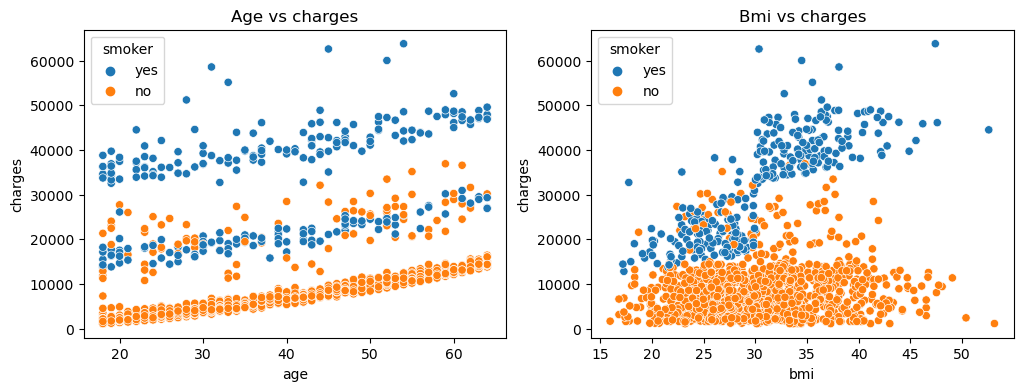

In [34]:
f = plt.figure(figsize=(12,4))
ax = f.add_subplot(121)
sns.scatterplot(x = 'age', y='charges', hue='smoker',data=df, ax=ax)
ax.set_title('Age vs charges')

ax =f.add_subplot(122)
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df,ax=ax)
ax.set_title('Bmi vs charges')

In [43]:
# Data preprocessing
categorical_columns = ['sex','children','smoker','region']
df_encode = pd.get_dummies(data= df, prefix='OHE',prefix_sep = '_', columns=categorical_columns, drop_first=True, dtype='int8')
print("Original data", df.columns)
print("Encoded_data", df_encode.columns)
df_encode.head()

Original data Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
Encoded_data Index(['age', 'bmi', 'charges', 'OHE_male', 'OHE_1', 'OHE_2', 'OHE_3', 'OHE_4',
       'OHE_5', 'OHE_yes', 'OHE_northwest', 'OHE_southeast', 'OHE_southwest'],
      dtype='object')


,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [45]:
from scipy.stats import boxcox
y_bc, lam, ci = boxcox(df_encode['charges'], alpha=0.5)
ci, lam

((0.02469408300432109, 0.06261692025437948), 0.043649053770664956)

In [46]:
df_encode['charges']= np.log(df_encode['charges'])

In [50]:
#Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X=df_encode.drop('charges', axis=1)
y=df_encode['charges']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=46)

In [54]:
#MODEL BUILDING
#Defining parameters manually
X_train_0 = np.c_[np.ones((X_train.shape[0],1)), X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)), X_test]
theta = np.matmul(np.linalg.inv(np.matmul(X_train_0.T, X_train_0)), np.matmul(X_train_0.T, y_train))
parameter = ['theta_'+ str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1']+list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,  'Columns':columns, 'theta':theta})

In [56]:
#Defining parameters using scikit learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,6.998929,6.998929
1,theta_1,age,0.034073,0.034073
2,theta_2,bmi,0.014470,0.014470
3,theta_3,OHE_male,-0.082340,-0.082340
4,theta_4,OHE_1,0.190871,0.190871
5,theta_5,OHE_2,0.316206,0.316206
6,theta_6,OHE_3,0.252518,0.252518
7,theta_7,OHE_4,0.531228,0.531228
8,theta_8,OHE_5,0.500154,0.500154
9,theta_9,OHE_yes,1.543070,1.543070


In [58]:
#MODEL EVALUATION manually
y_pred_norm = np.matmul(X_test_0, theta)
J_mse = np.sum((y_pred_norm-y_test)**2)/X_test_0.shape[0]
print('The mean squared error is:', J_mse)

The mean squared error is: 0.17536704185122548


In [62]:
#Model evaluation scikit learn
from sklearn.metrics import mean_squared_error
y_pred_sk = lin_reg.predict(X_test)
J_mse_sk = mean_squared_error(y_pred_sk, y_test)
print("The mean squared error is:", J_mse_sk)
R_square_sk = lin_reg.score(X_test, y_test)
print("R square is", R_square_sk)

The mean squared error is: 0.17536704185122254
R square is 0.7836312121021021
